In [109]:
from differences import ATTgt
from matplotlib import pyplot as plt
from analysis_utilities import aggregate_by_time_and_plot, aggregate_by_event_time_and_plot, \
    select_controls, test_balance, add_missing_indicators, prepare_df, generate_variable_names

plt.rcParams["figure.dpi"] = 300
plt.rcParams['savefig.dpi'] = 300
import pandas as pd

# Store paths.
INPUT_DATA = "/Users/arjunshanmugam/Documents/GitHub/seniorthesis/data/03_cleaned/crime_analysis.csv"
OUTPUT_FIGURES = "/Users/arjunshanmugam/Documents/GitHub/seniorthesis/output/crime_60m/figures"
OUTPUT_TABLES = "/Users/arjunshanmugam/Documents/GitHub/seniorthesis/output/crime_60m/tables"

# Read restricted sample panel dataset into memory.
df = pd.read_csv(INPUT_DATA)

analysis='any_crime_60m'

In [110]:
import numpy as np

value_vars_crime, month_to_int_dictionary, int_to_month_dictionary = generate_variable_names(analysis=analysis)

# Uncomment below line for "any crime" analysis
# df[value_vars_crime] = np.where(df[value_vars_crime] > 0, 1, 0)

In [111]:
covariates_exploration_df = select_controls(df=df, analysis=analysis, output_directory=OUTPUT_TABLES)
covariates_exploration_df

Dependent Variable  \
                                                                                       Any Crime Incidents Within 60m, Dec. 2022   
                                                 \emph{Independent Variable}                                                       
Panel A: Pre-treatment Outcomes                  twenty_seventeen_any_crime_60m                                     1.162519e-74   
                                                 pre_treatment_change_in_any_crime_60m                              7.200561e-01   
Panel B: Census Tract Characteristics            frac_coll_plus2010                                                 1.827735e-02   
                                                 job_density_2013                                                   1.073646e-23   
                                                 med_hhinc2016                                                      1.260460e-01   
                                                 poor_share2010                                                     3.299576e-01   
                                                 popdensity2010                                                     9.250803e-04   
                                                 rent_twobed2015                                                    7.788310e-10   
                                                 share_white2010                                                    4.739101e-01   
                                                 traveltime15_2010                                                  3.291751e-06   
Panel C: Case Initiation                         for_cause                                                          2.446166e-01   
                                                 no_cause                                                           7.544163e-02   
                                                 non_payment                                                        2.638625e-02   
Panel D: Defendant and Plaintiff Characteristics hasAttyD                                                           4.387275e-02   
                                                 hasAttyP                                                           1.758555e-03   
                                                 isEntityD                                                          4.016800e-01   
                                                 isEntityP                                                          2.402143e-06   

                                                                                                          
                                                                                       Plaintiff Victory  
                                                 \emph{Independent Variable}                              
Panel A: Pre-treatment Outcomes                  twenty_seventeen_any_crime_60m             8.276575e-01  
                                                 pre_treatment_change_in_any_crime_60m      1.939548e-01  
Panel B: Census Tract Characteristics            frac_coll_plus2010                         2.403331e-01  
                                                 job_density_2013                           1.626836e-01  
                                                 med_hhinc2016                              1.910501e-01  
                                                 poor_share2010                             1.428679e-01  
                                                 popdensity2010                             5.946111e-02  
                                                 rent_twobed2015                            5.003043e-01  
                                                 share_white2010                            9.829904e-02  
                                                 traveltime15_2010                          2.271578e-01  
Panel C: Case Initiation                         for_cause                    

In [112]:
balance_table, pre_treatment_covariates = test_balance(df, analysis, covariates_exploration_df, OUTPUT_TABLES)
balance_table

\
                                                Cases Won by Plaintiff   
Panel A twenty_seventeen_any_crime_60m                        2.029906   
Panel B Share with bachelor's degree                          0.322882   
        Jobs per square mile (2010)                       16069.137185   
        Population density (2010)                         23086.043553   
        Median two bedroom rent (2015)                     1339.985876   
        Share with commute $<$15 minutes (2010)               0.162315   
Panel C Non-payment of rent                                   0.781742   
Panel D Defendant has an attorney                             0.058237   
        Plaintiff has an attorney                             0.879853   
        Plaintiff is an entity                                0.808499   

                                                Difference in Cases Won by Defendant  \
                                                                          Unweighted   
Panel A twenty_seventeen_any_crime_60m                                     -0.035628   
Panel B Share with bachelor's degree                                        0.014179   
        Jobs per square mile (2010)                                      3197.929971   
        Population density (2010)                                        1373.148087   
        Median two bedroom rent (2015)                                    -29.551242   
        Share with commute $<$15 minutes (2010)                             0.005986   
Panel C Non-payment of rent                                                 0.068150   
Panel D Defendant has an attorney                                          -0.177200   
        Plaintiff has an attorney                                           0.071601   
        Plaintiff is an entity                                              0.099762   

                                                                             \
                                                     \emph{p}      Weighted   
Panel A twenty_seventeen_any_crime_60m           8.276575e-01      0.124403   
Panel B Share with bachelor's degree             2.403331e-01      0.071151   
        Jobs per square mile (2010)              1.626836e-01  12355.848442   
        Population density (2010)                5.946111e-02    533.458928   
        Median two bedroom rent (2015)           5.003043e-01    174.328935   
        Share with commute $<$15 minutes (2010)  2.271578e-01      0.022651   
Panel C Non-payment of rent                      2.880676e-03      0.163133   
Panel D Defendant has an attorney                5.780991e-31     -0.228635   
        Plaintiff has an attorney                1.016046e-04      0.205784   
        Plaintiff is an entity                   6.134468e-06      0.228889   

                                                               
                                                     \emph{p}  
Panel A twenty_seventeen_any_crime_60m           6.571269e-01  
Panel B Share with bachelor's degree             1.227474e-03  
        Jobs per square mile (2010)              4.445894e-03  
        Population density (2010)                7.058503e-01  
        Median two bedroom rent (2015)           2.997888e-02  
        Share with commute $<$15 minutes (2010)  1.918569e-02  
Panel C Non-payment of rent                      1.072422e-04  
Panel D Defendant has an attorney                1.045959e-22  
        Plaintiff has an attorney                2.868523e-09  
        Plaintiff is an entity                   1.085859e-08

In [113]:
# Store treatment date variable -- may be either file_date or latest_docket_date -- and drop rows where missing.
treatment_date_variable = 'file_date'
treatment_month_variable = treatment_date_variable.replace('date', 'month')

# Generate indicators for missing data.
add_missing_indicators(df, ['rent_twobed2015'], pre_treatment_covariates)

# Prepare df for use with the differences package.
df = prepare_df(df, analysis, treatment_date_variable, pre_treatment_covariates, value_vars_crime, month_to_int_dictionary)

In [114]:
# Run DiD without conditioning on covariates.
att_gt = ATTgt(data=df, cohort_name=treatment_month_variable, freq='M')
result = att_gt.fit(formula=analysis, control_group='never_treated', n_jobs=-1)

Computing ATTgt [workers=10]  100%|████████████████████| 2184/2184 [00:14<00:00, 152.66it/s]


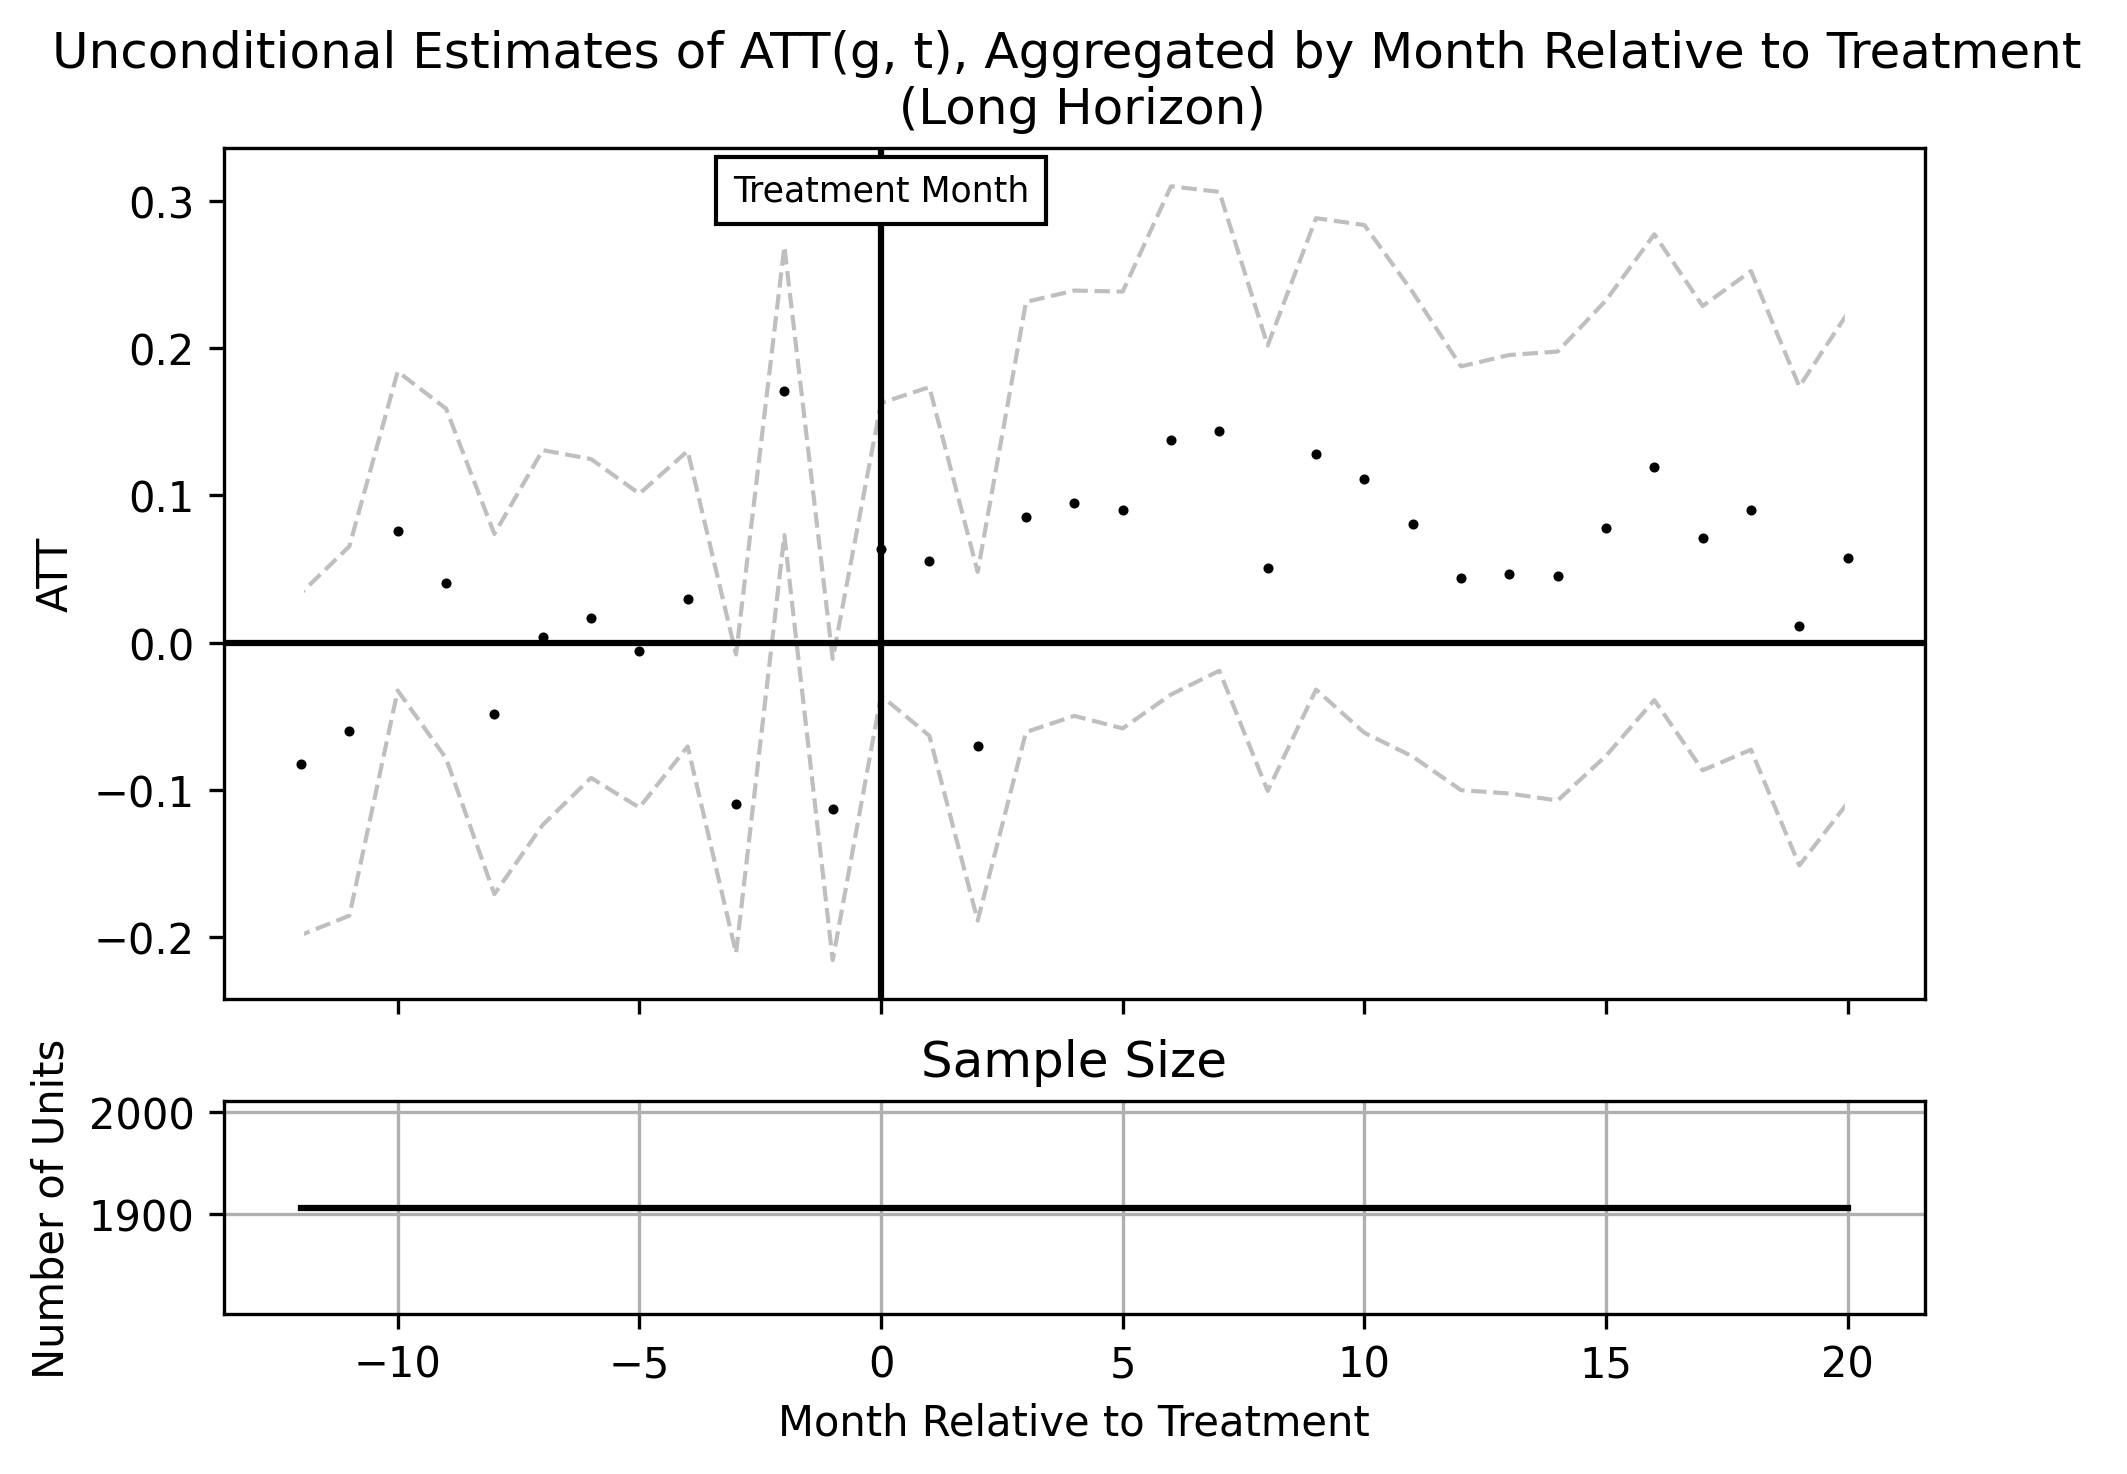

In [115]:
# Plot unconditional ATT(t-g)s on a long horizon.
aggregate_by_event_time_and_plot(att_gt, OUTPUT_FIGURES, "att_gt_unconditional_event_study_long_horizon.png",
                                 start_period=-12, end_period=20,
                                 title="Unconditional Estimates of ATT(g, t), Aggregated by Month Relative to Treatment \n (Long Horizon)",
                                 treatment_month_variable=treatment_month_variable, df=df)

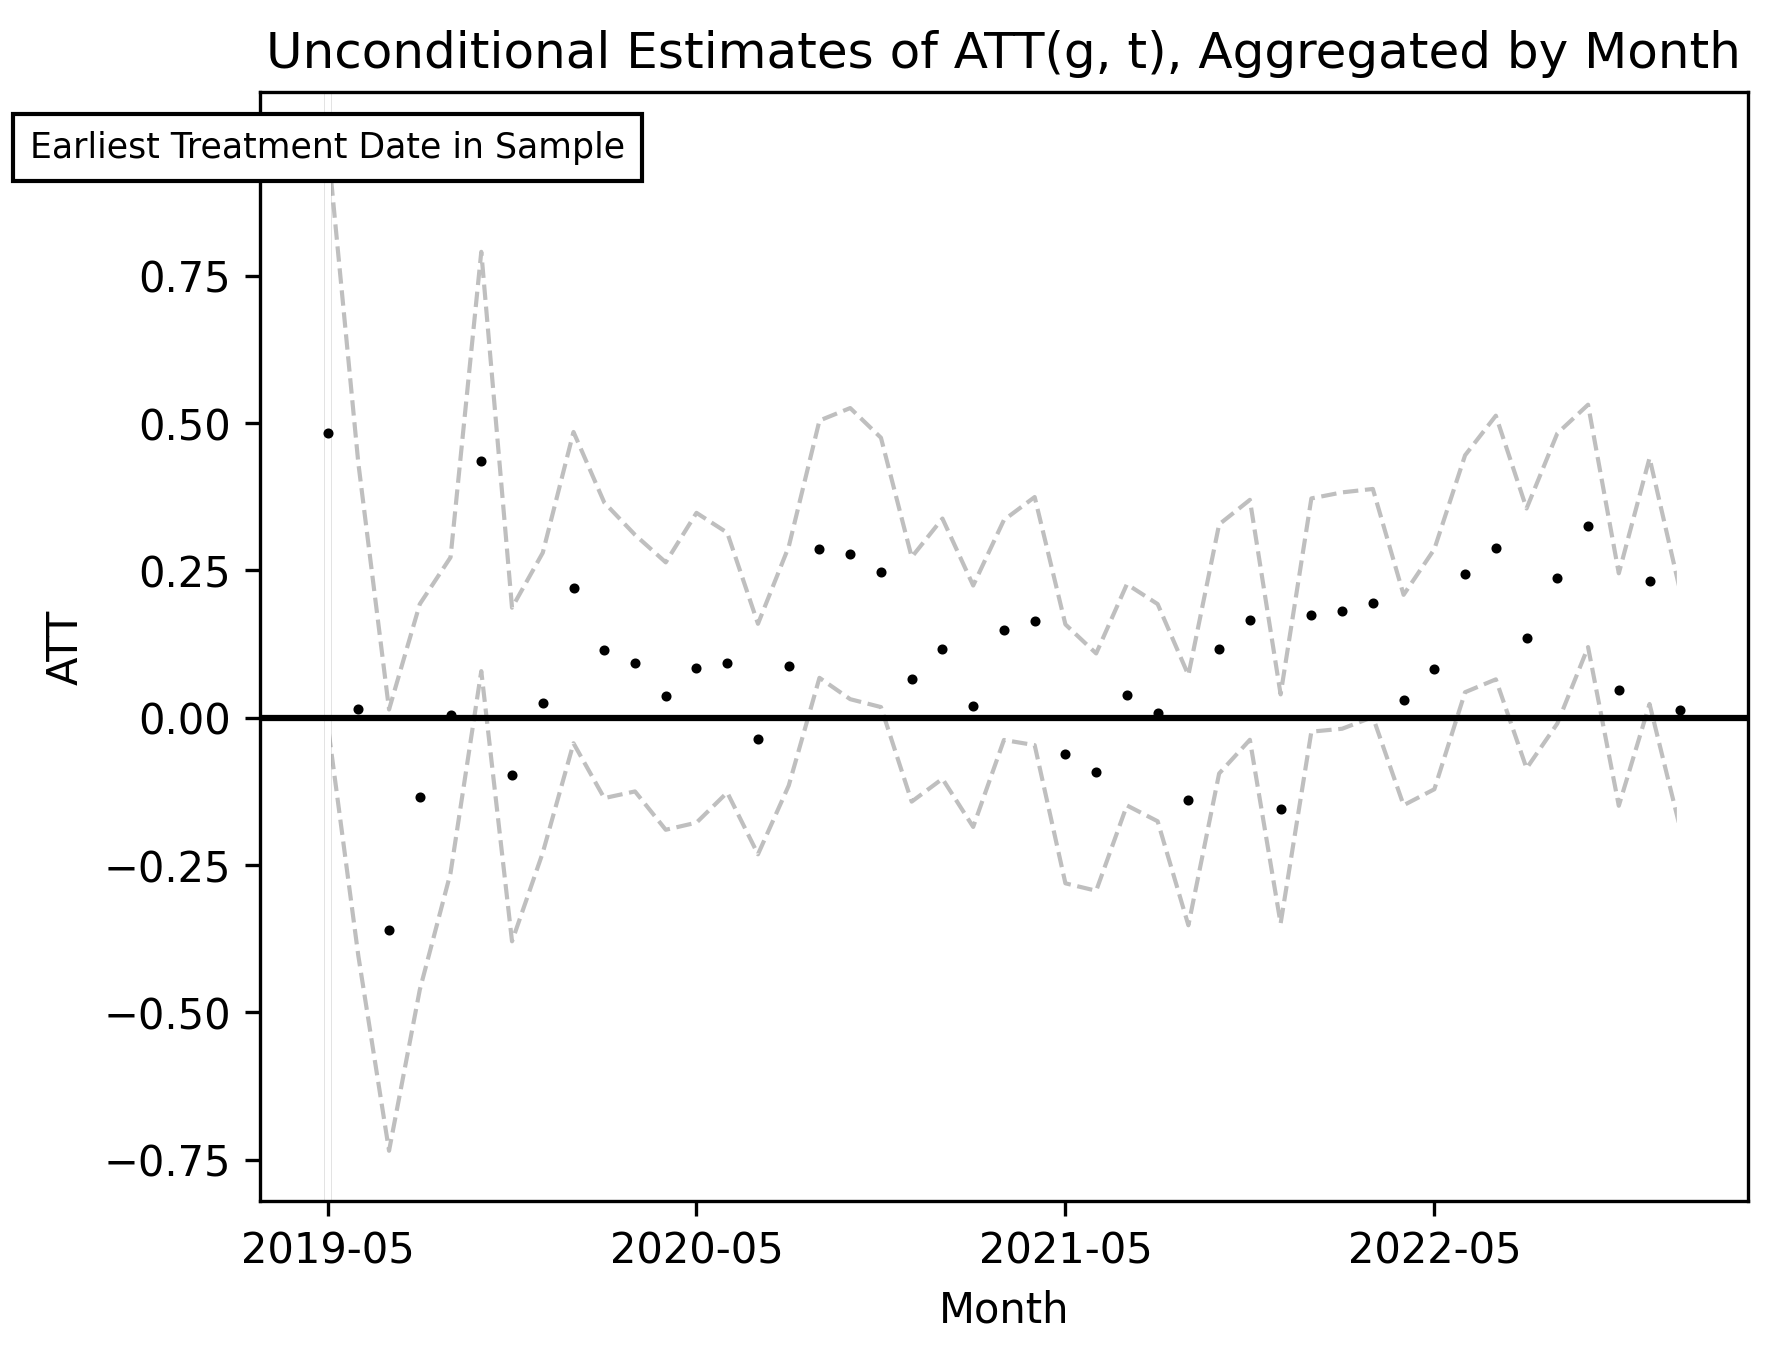

In [116]:
# Plot unconditional ATT(t)s.
aggregate_by_time_and_plot(att_gt, int_to_month_dictionary, OUTPUT_FIGURES, "att_gt_unconditional_time.png",
                           title="Unconditional Estimates of ATT(g, t), Aggregated by Month")

In [ ]:
# Run DiD conditional on covariates.
att_gt = ATTgt(data=df, cohort_name=treatment_month_variable, freq='M')
formula = f'{analysis} ~ ' + '+'.join(pre_treatment_covariates)
result = att_gt.fit(formula=formula, control_group='never_treated', n_jobs=-1)

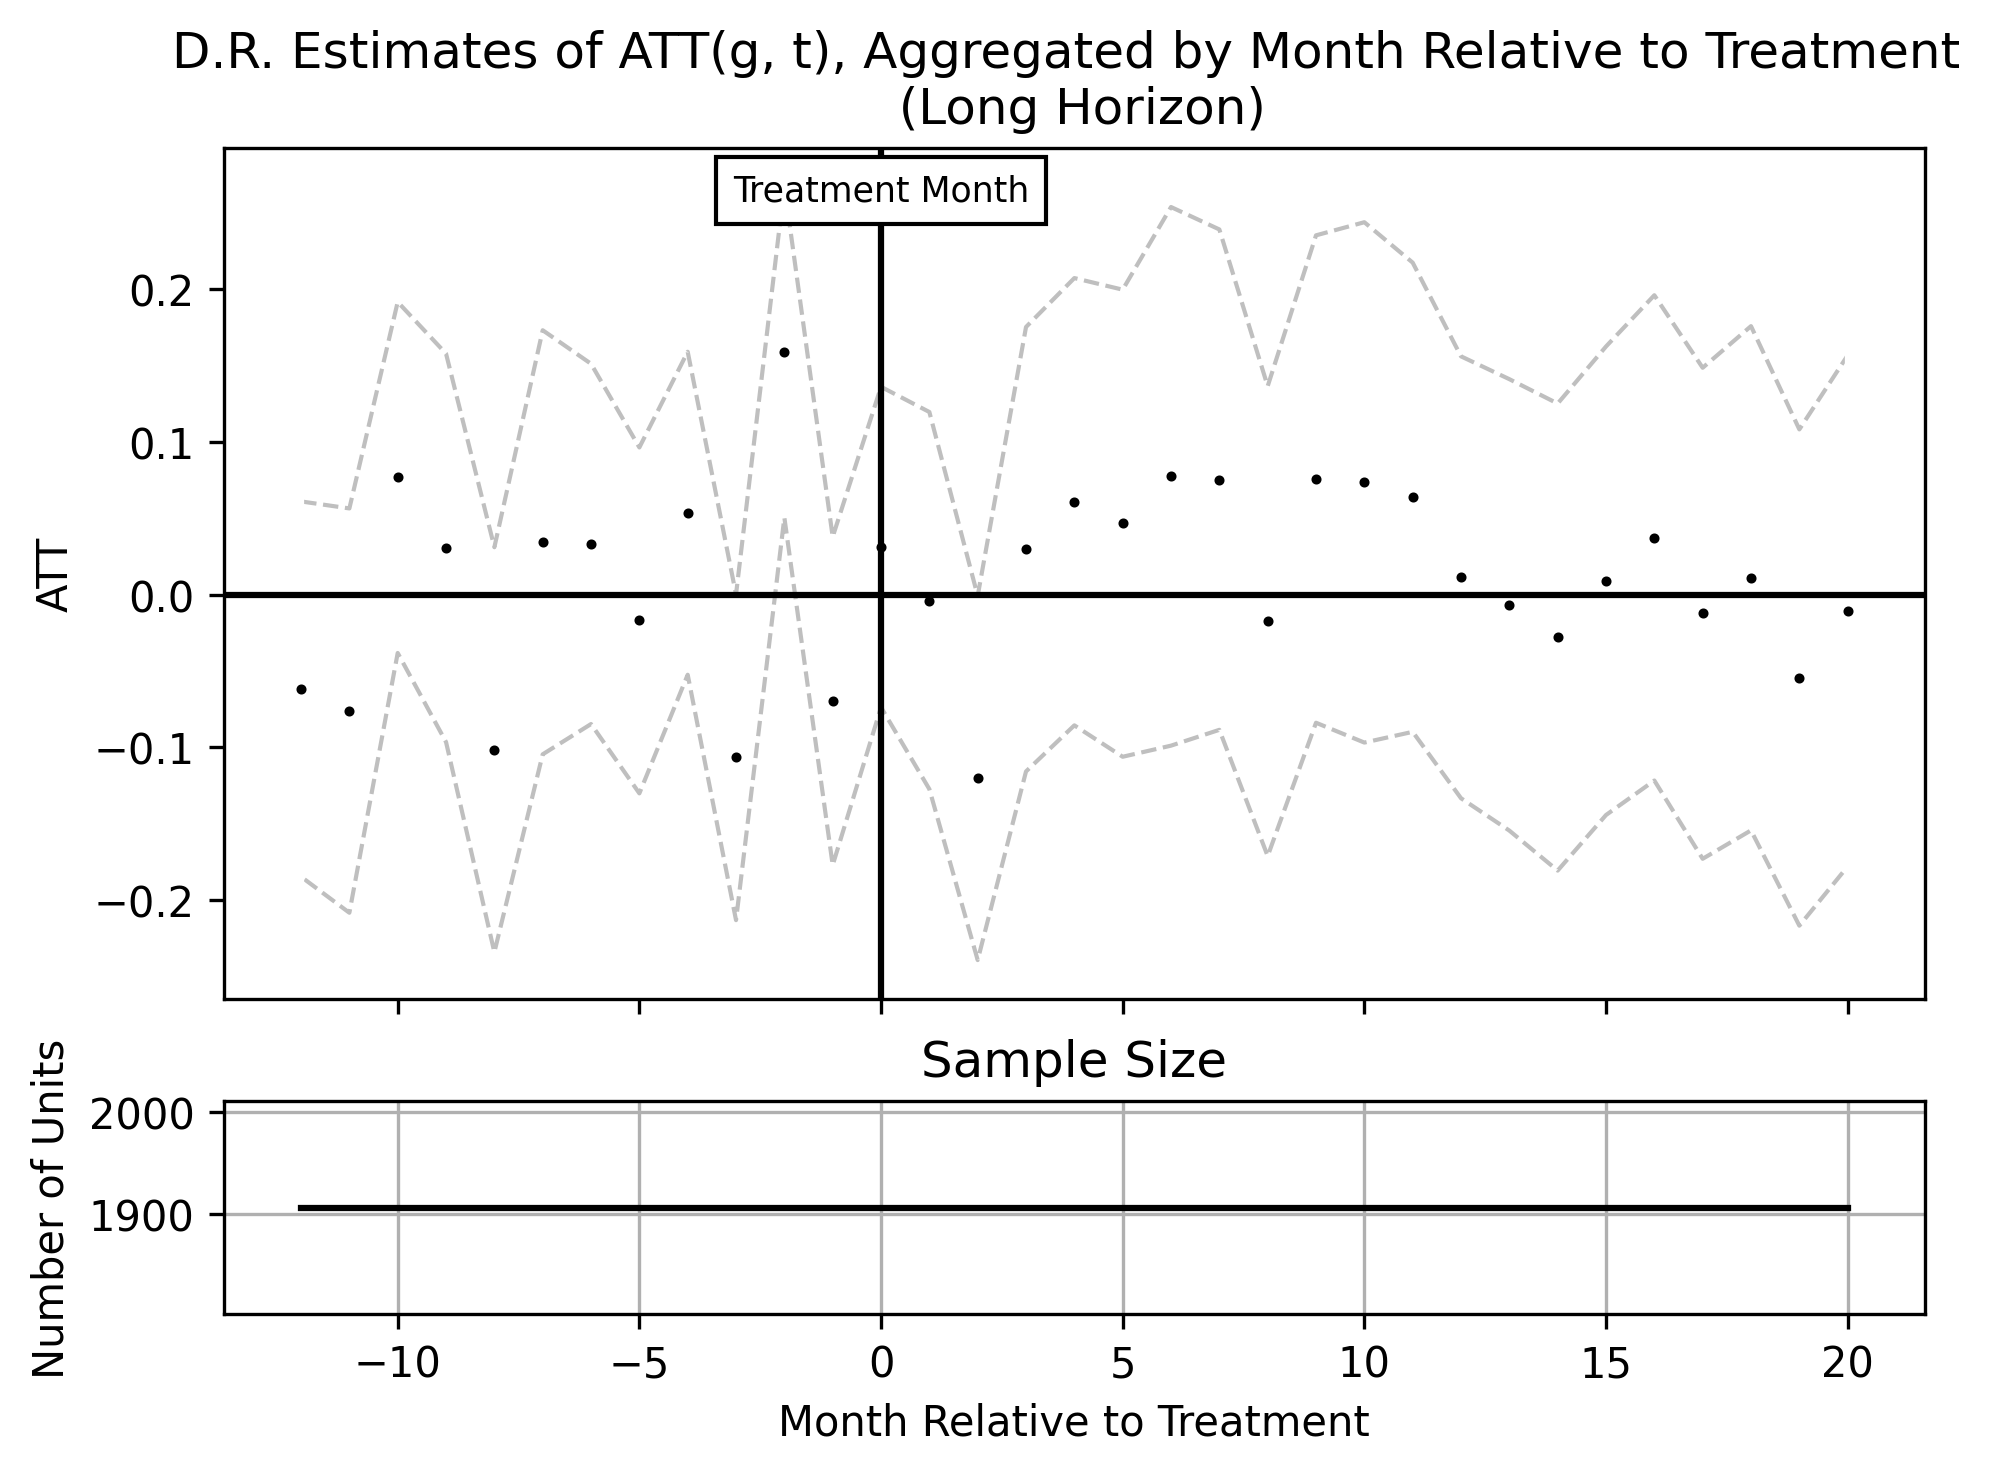

In [118]:
# Plot D.R. ATT(t-g)s on a long horizon.
aggregate_by_event_time_and_plot(att_gt, OUTPUT_FIGURES, "att_gt_dr_event_study_long_horizon.png", start_period=-12,
                                 end_period=20,
                                 title="D.R. Estimates of ATT(g, t), Aggregated by Month Relative to Treatment \n (Long Horizon)",
                                 treatment_month_variable=treatment_month_variable, df=df)

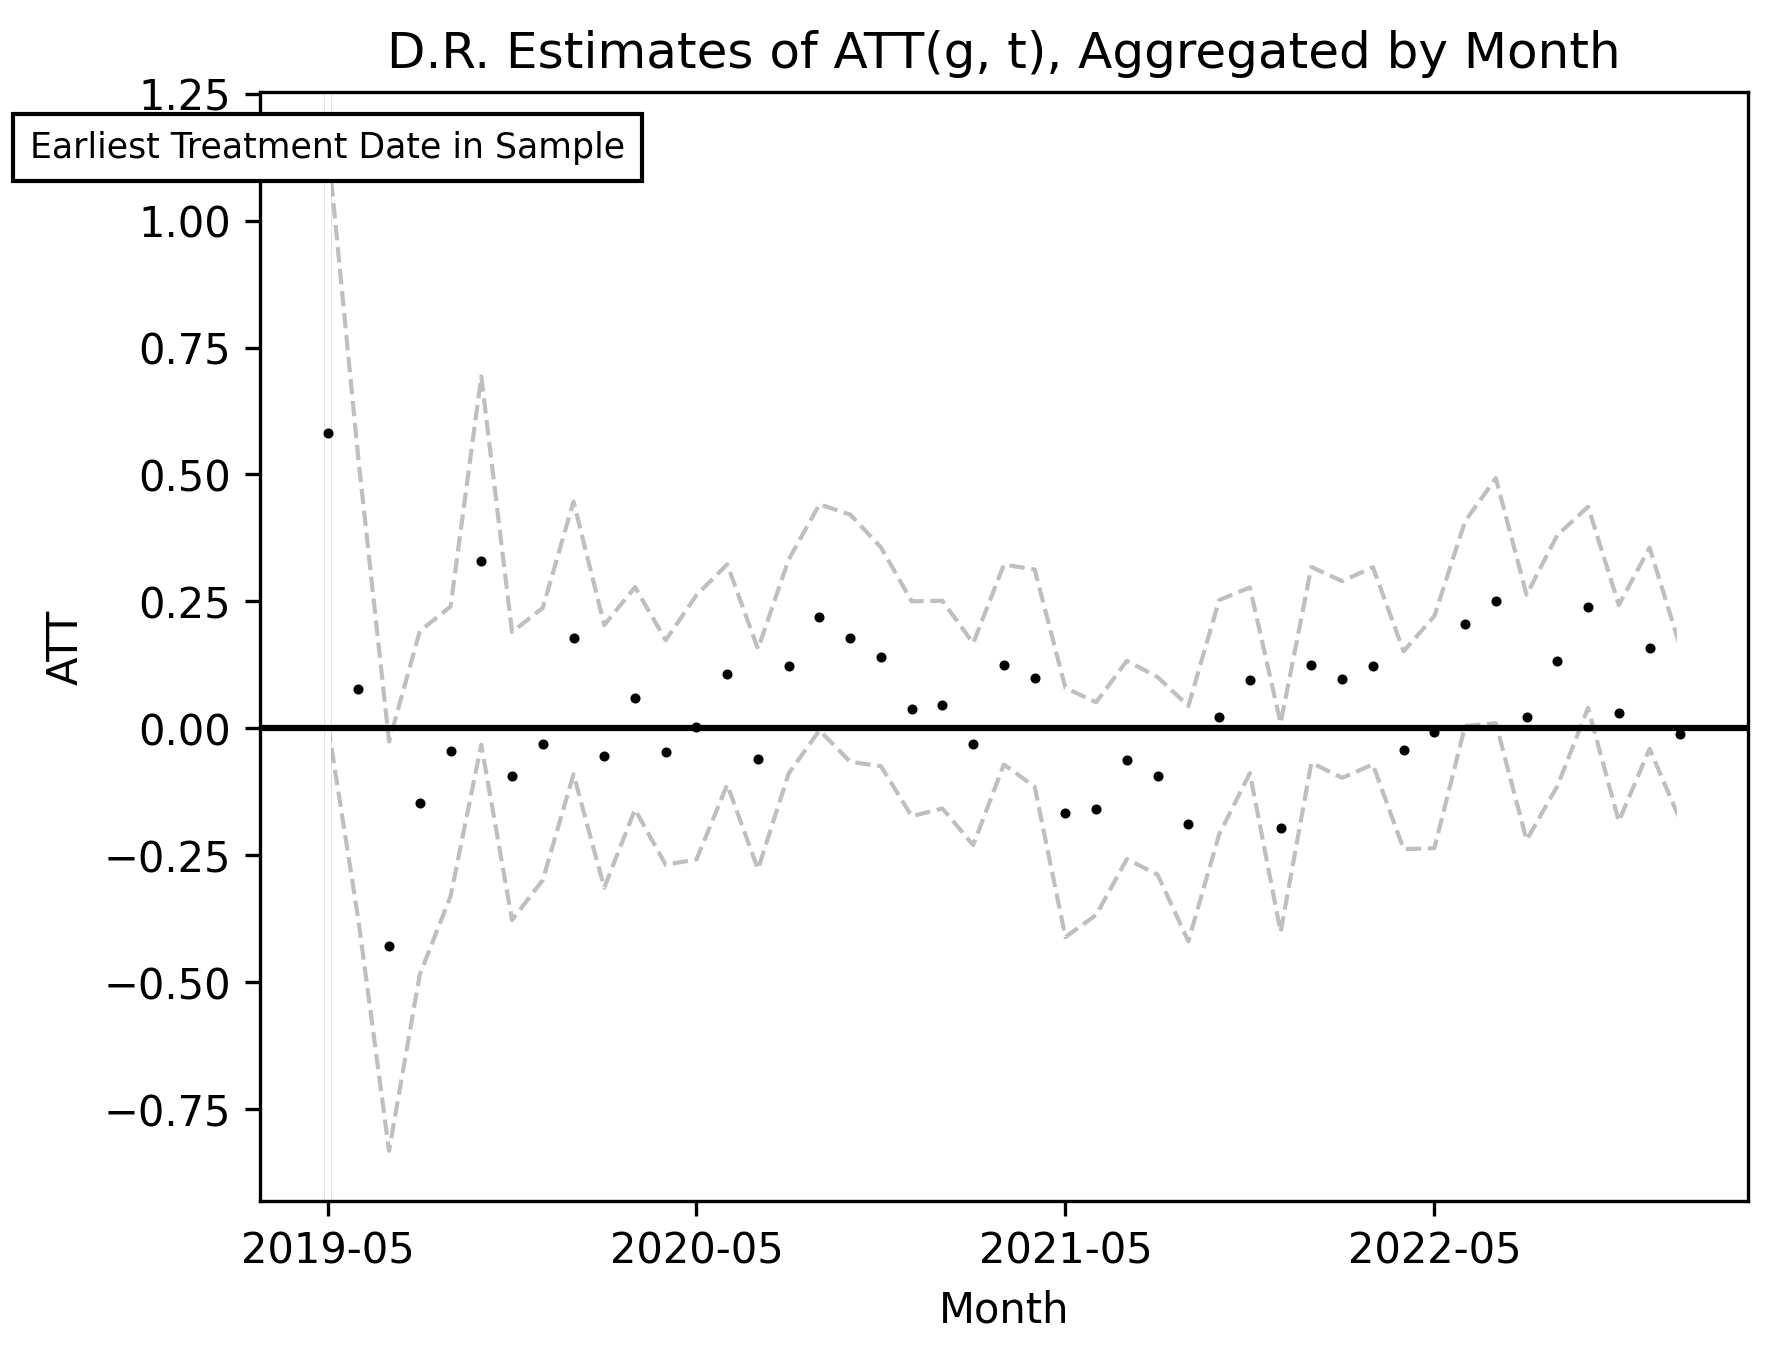

In [119]:
# Plot D.R. ATT(t)s.
aggregate_by_time_and_plot(att_gt, int_to_month_dictionary, OUTPUT_FIGURES, "att_gt_dr_time.png",
                           title="D.R. Estimates of ATT(g, t), Aggregated by Month")